ANN Classification task with Keras API for TF 2.0
Dataset: Breast cancer wisconsin (diagnostic) dataset

Dataset Characteristics:

    o Number of Instances: 569

    o Number of Attributes: 30 numeric, predictive attributes and the class

    o Attribute Information:
    - radius (Distance mean from center to points on perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

    o class:
            - WDBC-Malignant
            - WDBC-Benign

    o Missing Attribute Values: None
    
    o Class Distribution: 212 - Malignant, 357 - Benign

    o Summary Statistics:

===================================== ====== ======
                                       Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2


In [2]:
# importing libraries
import pandas as pd
import numpy as np

# Read data
df = pd.read_csv('C:/Users/rumma/Desktop/NeuralNetworkPractice/cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Part 1: Exploratory data analysis (EDA)

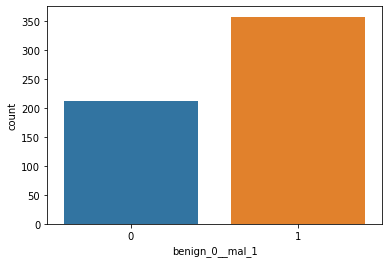

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='benign_0__mal_1',data=df)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

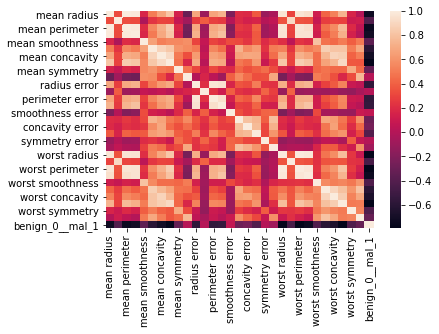

In [9]:
sns.heatmap(df.corr())
df.corr()['benign_0__mal_1'].sort_values()

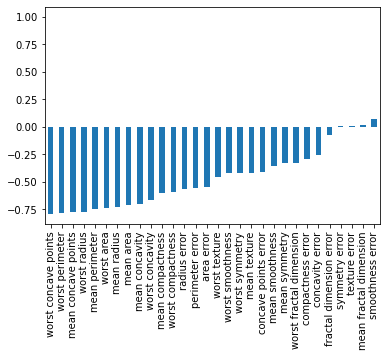

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

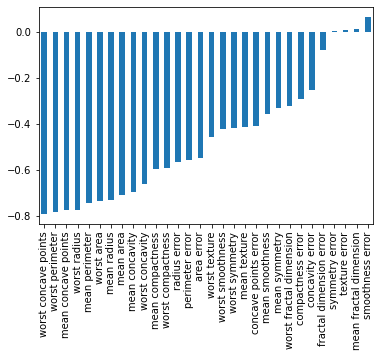

In [12]:
# remove the label column
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Part 2: Data Preprocessing

In [15]:
# Train- test split
from sklearn.model_selection import train_test_split
X = df.drop('benign_0__mal_1',axis=1).values # convert to numpy
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [16]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3: Building the ANN model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape()

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# Part 4: Training ANN

In [20]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 3s 112ms/step - loss: 0.6673 - val_loss: 0.6331
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6127 - val_loss: 0.5776
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5682 - val_loss: 0.5181
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4983 - val_loss: 0.4668
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4635 - val_loss: 0.4165
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4085 - val_loss: 0.3733
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3616 - val_loss: 0.3370
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3416 - val_loss: 0.3048
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2975 - val_loss: 0.2748
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2644 - val_loss: 0.2561
Epoch 

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0640 - val_loss: 0.1007
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0491 - val_loss: 0.1069
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0507 - val_loss: 0.1033
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.1116
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0710 - val_loss: 0.1011
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0563 - val_loss: 0.1034
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.1056
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0493 - val_loss: 0.1061
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0530 - val_loss: 0.1092
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0595 - val_loss: 0.1037


14/14 [==============================] - 0s 5ms/step - loss: 0.0511 - val_loss: 0.1168
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0502 - val_loss: 0.1179
Epoch 166/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0267 - val_loss: 0.1222
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0424 - val_loss: 0.1304
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.1305
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.1128
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.1228
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.1211
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0386 - val_loss: 0.1277
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.1130
Epo

14/14 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.1149
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0333 - val_loss: 0.1190
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0172 - val_loss: 0.1214
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0281 - val_loss: 0.1192
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0273 - val_loss: 0.1196
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.1168
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0198 - val_loss: 0.1410
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.1134
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.1322
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.1161
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.1368
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0192 - val_loss: 0.1252
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0217 - val_loss: 0.1473
Epoch 329/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0209 - val_loss: 0.1314
Epoch 330/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0340 - val_loss: 0.1368
Epoch 331/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0187 - val_loss: 0.1263
Epoch 332/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.1298
Epoch 333/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0228 - val_loss: 0.1384
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0381 - val_loss: 0.1241
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.1272
Epo

14/14 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 0.1486
Epoch 408/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0183 - val_loss: 0.1379
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.1466
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0117 - val_loss: 0.1434
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0132 - val_loss: 0.1562
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.1345
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.1551
Epoch 414/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0185 - val_loss: 0.1458
Epoch 415/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.1476
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.1471
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.1859
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0159 - val_loss: 0.1907
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.1857
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.1970
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.1981
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.1942
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.2064
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.1865
Epoch 496/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.1953
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.1962
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.2469
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.2469
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.2470
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.2415
Epoch 573/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.2700
Epoch 574/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0101 - val_loss: 0.2343
Epoch 575/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0116 - val_loss: 0.2465
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.2491
Epoch 577/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0069 - val_loss: 0.2436
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.2555


In [25]:
model.history.history

{'loss': [0.6589473485946655,
  0.6056727766990662,
  0.5481564998626709,
  0.49311721324920654,
  0.4444085359573364,
  0.4005652070045471,
  0.36389005184173584,
  0.33016014099121094,
  0.30367228388786316,
  0.27713140845298767,
  0.2561320960521698,
  0.23728126287460327,
  0.21756824851036072,
  0.20521365106105804,
  0.1923380345106125,
  0.180840864777565,
  0.1749970018863678,
  0.1664823591709137,
  0.157815083861351,
  0.14674706757068634,
  0.14084812998771667,
  0.1313176155090332,
  0.12735719978809357,
  0.12612509727478027,
  0.1179388016462326,
  0.11399859935045242,
  0.10761073231697083,
  0.10361625254154205,
  0.10166241973638535,
  0.09841522574424744,
  0.0942889004945755,
  0.09272326529026031,
  0.09025195986032486,
  0.08656958490610123,
  0.08555812388658524,
  0.08948753774166107,
  0.08238153159618378,
  0.08055459707975388,
  0.07736703008413315,
  0.07521171122789383,
  0.07459564507007599,
  0.07451118528842926,
  0.07410117983818054,
  0.073744840919971

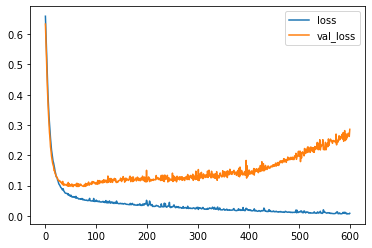

In [24]:
model.history.history
# model_loss
model_loss.plot()

# Part 5: Model Tuning and Optimization
Challenges: Overfitting
Ways to handle overfitting-
    o early stopping
    0 dropout

In [26]:
# Early Stopping
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 25ms/step - loss: 0.6649 - val_loss: 0.6429
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6207 - val_loss: 0.6021
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5983 - val_loss: 0.5602
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5120
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5056 - val_loss: 0.4611
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4398 - val_loss: 0.4096
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4084 - val_loss: 0.3628
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3859 - val_loss: 0.3245
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3473 - val_loss: 0.2919
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2926 - val_loss: 0.2631
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0590 - val_loss: 0.1085
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0561 - val_loss: 0.0939
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0508 - val_loss: 0.1022
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0603 - val_loss: 0.0921
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0523 - val_loss: 0.1024
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0981
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0416 - val_loss: 0.0971
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0455 - val_loss: 0.0995
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0414 - val_loss: 0.1083
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0992


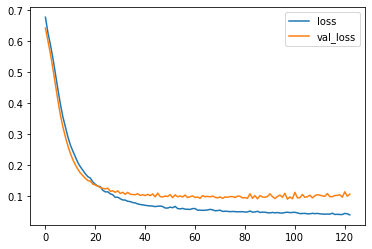

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
# Add DropOut Layers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 36ms/step - loss: 0.7579 - val_loss: 0.7267
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7228 - val_loss: 0.6954
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7039 - val_loss: 0.6705
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6537 - val_loss: 0.6485
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6425 - val_loss: 0.6225
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6127 - val_loss: 0.5932
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5795 - val_loss: 0.5659
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6061 - val_loss: 0.5422
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5572 - val_loss: 0.5169
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5294 - val_loss: 0.4883
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1364 - val_loss: 0.1111
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1397 - val_loss: 0.1111
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1383 - val_loss: 0.1138
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1150 - val_loss: 0.1152
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1117 - val_loss: 0.1104
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1487 - val_loss: 0.1123
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1225 - val_loss: 0.1119
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1130 - val_loss: 0.1100
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1287 - val_loss: 0.1107
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1029 - val_loss: 0.1137


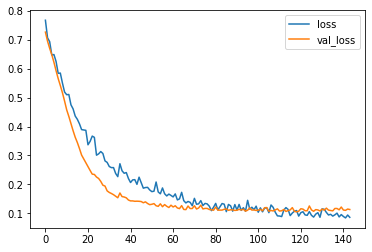

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Part 6: Model Evaluation

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

C:\Users\rumma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [33]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]
